In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Loading images

**First image will be low resolution version of previously used image and will be resized accordingly**

In [71]:
def load_image(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

In [72]:
def show_image(file):
    img = load_image(file)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img_RGB)
    return plt.show()

In [73]:
def save_image(filename, image):
    saved_image = cv2.imwrite(filename, image)
    print(f"saved as {filename}")
    return None

In [74]:
def resize_image(file, new_width, new_height):
    img = load_image(file)
    img_new = cv2.resize(img, (new_width, new_height))
    filename = f"resized_{new_width}x{new_height}_{file}"
    save_image(filename, img_new)
    return show_image(filename)

saved as resized_1024x874_DA_avatar.png


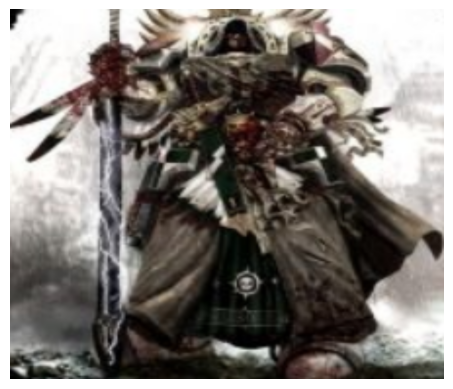

In [75]:
resize_image("DA_avatar.png", 1024, 874)

In [76]:
image_1 = "resized_1024x874_DA_avatar.png"

**Second image will be an image with dead pixels in it**

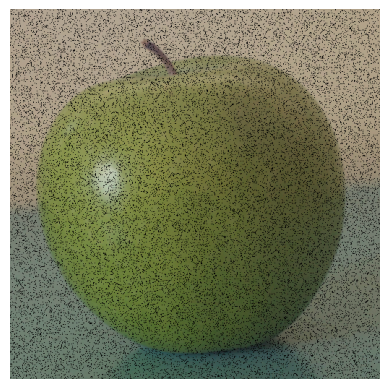

In [77]:
image_2 = "Apple.png"
show_image(image_2)

# Sobel Edge Detector

In [78]:
def sobel(image):
    img = load_image(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ddept = cv2.CV_64F
    x = cv2.Sobel(gray, ddept, 1,0, ksize=3, scale=1)
    y = cv2.Sobel(gray, ddept, 0,1, ksize=3, scale=1)
    absx= cv2.convertScaleAbs(x)
    absy = cv2.convertScaleAbs(y)
    edge = cv2.addWeighted(absx, 0.5, absy, 0.5,0)
    filename = f"sobel_{image}"
    save_image(filename, edge)
    return show_image(filename)

saved as sobel_resized_1024x874_DA_avatar.png


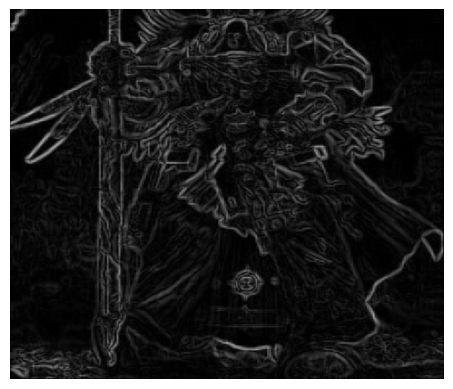

In [79]:
sobel(image_1)

saved as sobel_Apple.png


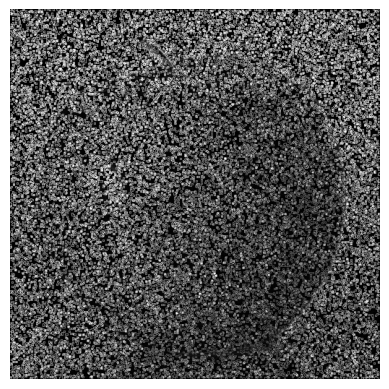

In [80]:
sobel(image_2)

# Median Filter

In [81]:
def median_filter(image):
    img = load_image(image)
    img_new = cv2.medianBlur(img,5)
    filename = f"median_filter_{image}"
    save_image(filename, img_new)
    return show_image(filename)

saved as median_filter_resized_1024x874_DA_avatar.png


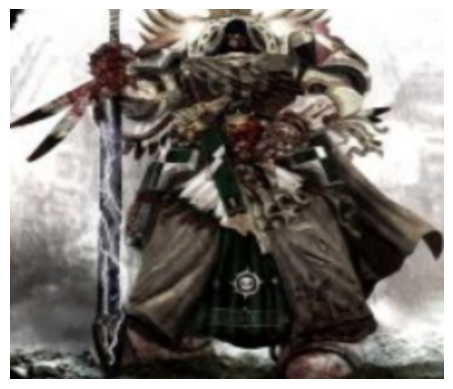

In [82]:
median_filter(image_1)

saved as median_filter_Apple.png


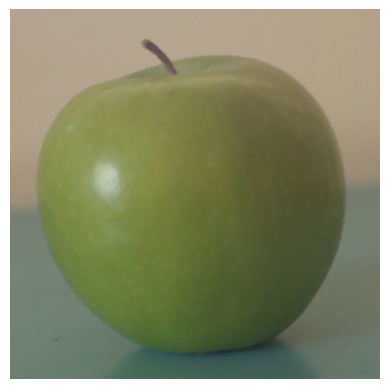

In [83]:
median_filter(image_2)

# Conclusions

In [84]:
def colored(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

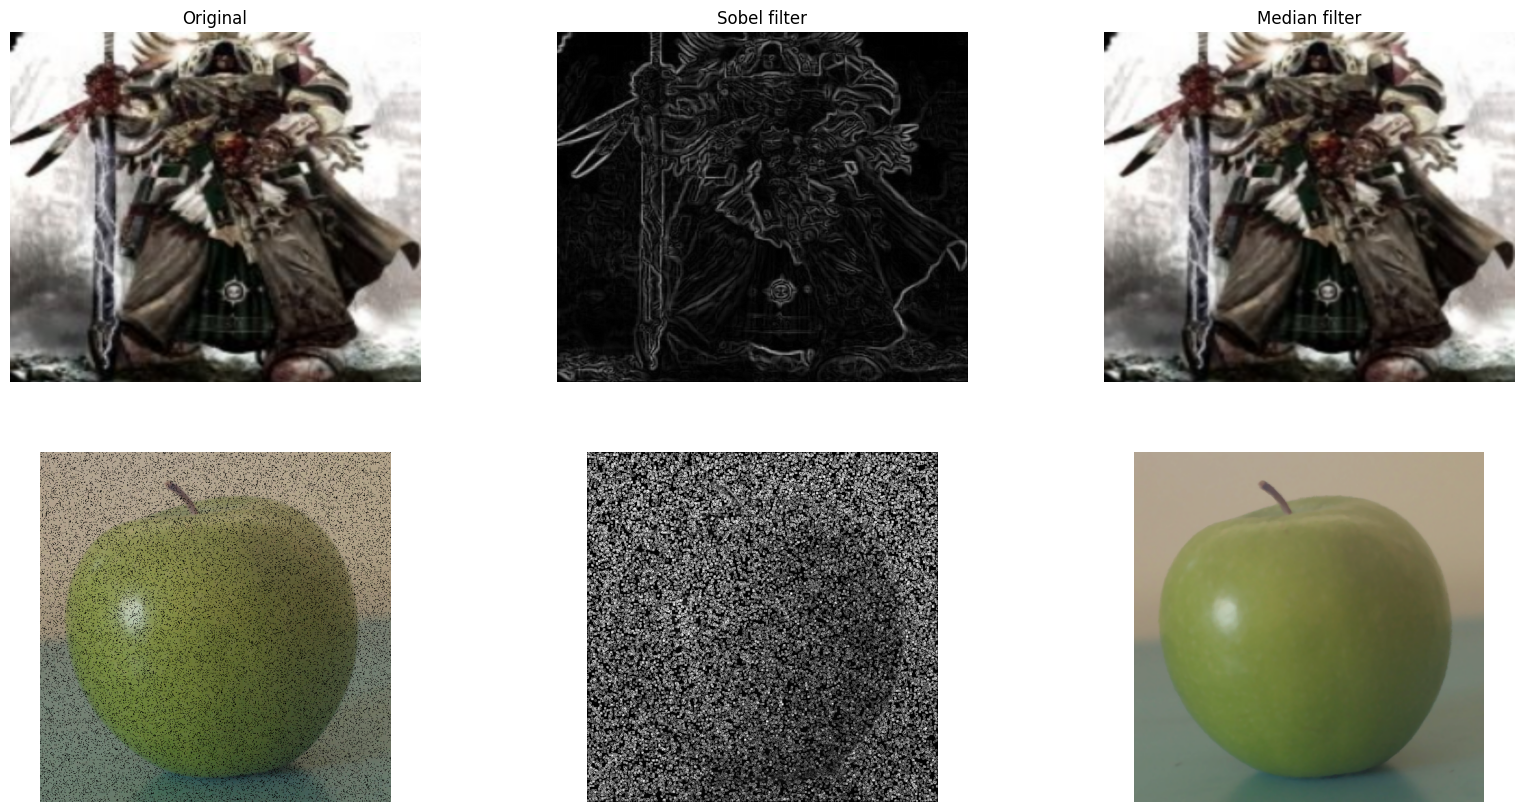

In [85]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))
axs[0, 0].imshow(colored(image_1))
axs[0, 0].axis("off")
axs[1, 0].imshow(colored(image_2))
axs[1, 0].axis("off")
axs[0, 0].set_title("Original")
axs[0, 1].imshow(colored("sobel_resized_1024x874_DA_avatar.png"))
axs[0, 1].axis("off")
axs[1, 1].imshow(colored("sobel_Apple.png"))
axs[1, 1].axis("off")
axs[0, 1].set_title("Sobel filter")
axs[0, 2].imshow(colored("median_filter_resized_1024x874_DA_avatar.png"))
axs[0, 2].axis("off")
axs[1, 2].imshow(colored("median_filter_Apple.png"))
axs[1, 2].axis("off")
axs[0, 2].set_title("Median filter")
plt.show()

**Sobel edge detector helps define the gradient zones on the image and makes even the low resolution image "readable". It clealry doesn't work with images where are lots of dead pixels.**

**Median filter doesn't improve "readability" of the low resolution image much. However, it is ultimatively good for removing dead pixels from the image.**

**Both handle their own task good. Choice of the filter should depend on the desired outcome and initial data.**